## A Deep Learning Based Approach to Paraphrase Detection

### System Architecture

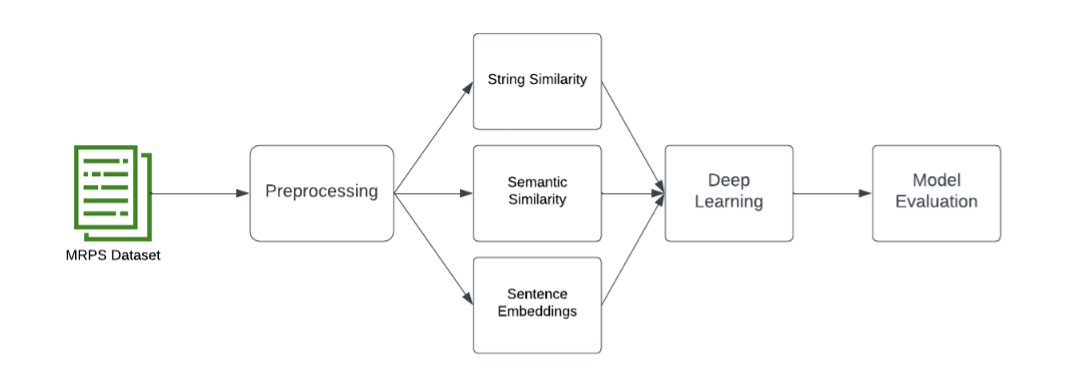

### 1. Importing Necessary Packages

In [83]:
# Step 1: Import necessary libraries
import os
import pandas as pd
import numpy as np
import re
import nltk
import pickle
import textdistance
import sister

from keras.layers import Dense, Dropout, Input, concatenate, Reshape
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

from sentence_transformers import SentenceTransformer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keerthana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keerthana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/keerthana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2. Loading the Dataset

In [2]:
# Step 2: Load the text data into a dataframe
df_train = pd.read_csv('/Users/keerthana/Documents/MS CSC/CSC 215/Final_Project/train.csv')

df_test = pd.read_csv('/Users/keerthana/Documents/MS CSC/CSC 215/Final_Project/test.csv')

### 3. Data PreProcessing

In [3]:
df_train.head()

,label,id_1,id_2,sentence1,sentence2
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [4]:
df_train.shape

(4076, 5)

In [5]:
df_test.head()

,label,id_1,id_2,sentence1,sentence2
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...
1,1,3019446,3019327,The world's two largest automakers said their ...,Domestic sales at both GM and No. 2 Ford Motor...
2,1,1945605,1945824,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...
3,0,1430402,1430329,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...
4,0,3354381,3354396,The company didn't detail the costs of the rep...,But company officials expect the costs of the ...


In [6]:
df_test.shape

(1725, 5)

In [7]:
df_train['label'].value_counts()

1    2753
0    1323
Name: label, dtype: int64

In [8]:
df_test['label'].value_counts()

1    1147
0     578
Name: label, dtype: int64

In [9]:
# Remove punctuation, numbers, and stop words
def preprocess(text):
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    words = text.split()
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [10]:
#trainig data
df_train['sentence1'] = df_train['sentence1'].apply(preprocess)
df_train['sentence2'] = df_train['sentence2'].apply(preprocess)

#testing data
df_test['sentence1'] = df_test['sentence1'].apply(preprocess)
df_test['sentence2'] = df_test['sentence2'].apply(preprocess)

### 4. Implementing Similarity Techniques

#### 1. String Similarity

In [11]:
# 27 String Similarity algorithms to compute similarity scores between each pair of sentences
algorithms = [
    textdistance.levenshtein,
    textdistance.damerau_levenshtein,
    textdistance.hamming,
    textdistance.jaro,
    textdistance,
    textdistance.cosine,
    textdistance.jaccard,
    textdistance.sorensen,
    textdistance.needleman_wunsch,
    textdistance.smith_waterman,
    textdistance.gotoh,
    textdistance.lcsseq,
    textdistance.lcsstr,
    textdistance.monge_elkan,
    textdistance.ratcliff_obershelp,
    textdistance.overlap,
    textdistance.bag,
    textdistance.matrix,
    textdistance.mlipns,
    textdistance.mra,
    textdistance.prefix,
    textdistance.postfix,
    textdistance.identity,
    textdistance.length,
    textdistance.ratcliff_obershelp,
    textdistance.entropy_ncd,
    textdistance.strcmp95,
]

In [12]:
def generate_string_similarity_scores(df):
    string_similarity_features = []
    for algo in algorithms:
        similarity_scores = []
        for index, row in df.iterrows():
            similarity_scores.append(algo.normalized_similarity(row['sentence1'],row['sentence2']))
        print(len(string_similarity_features))
        string_similarity_features.append(similarity_scores)
    return string_similarity_features

In [13]:
train_string_similarity_feature = generate_string_similarity_scores(df_train)
test_string_similarity_feature = generate_string_similarity_scores(df_test)
print("string sims done...")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
string sims done...


In [14]:
#Training Set 

#Pickling the training similarity scores

# with open('train_stringsimscores.pkl', 'wb') as f:
#     pickle.dump(train_string_similarity_feature,f)
    
#Using the pickled similarity scores
with open('train_stringsimscores.pkl', 'rb') as f:
    train_string_similarity_feature = pickle.load(f)

In [15]:
#Testing Set

#Pickling the testing similarity scores
# with open('test_stringsimscores.pkl', 'wb') as f:
#     pickle.dump(test_string_similarity_feature,f)
    
#Using the pickled similarity scores
with open('test_stringsimscores.pkl', 'rb') as f:
    test_string_similarity_feature = pickle.load(f)

#### 2. Semantic Similarity

In [16]:
# Extract embeddings using different models
# Use pretrained GloVe embeddings

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

def get_word_vector(word, embeddings):
    return embeddings.get(word, None)

def get_sentence_embedding(sentence, embeddings):
    words = word_tokenize(sentence.lower())
    word_vectors = [get_word_vector(word, embeddings) for word in words]
    word_vectors = [vector for vector in word_vectors if vector is not None]
    if len(word_vectors) == 0:
        return None
    sentence_embedding = np.mean(word_vectors, axis=0)
    return sentence_embedding


In [17]:
# Load GloVe embeddings - downloaded from Stanford website
glove_file = '/Users/keerthana/Downloads/glove.6B/glove.6B.50d.txt'
glove_embeddings = load_glove_embeddings(glove_file)

In [18]:
# Get the sentence embedding for a sample sentence
def get_glove_embedding_similarity_scores(df):
    glove_embedding_similarity_scores = []
    for index, row in df.iterrows():
        sentence_embeddings1 = get_sentence_embedding(row["sentence1"], glove_embeddings)
        sentence_embeddings2 = get_sentence_embedding(row["sentence2"], glove_embeddings)
        cos_sim = np.dot(sentence_embeddings1, sentence_embeddings2) / (
                            np.linalg.norm(sentence_embeddings1) * np.linalg.norm(sentence_embeddings2))
        glove_embedding_similarity_scores.append(cos_sim)
    return glove_embedding_similarity_scores

In [19]:
# train_glove_embedding_similarity_scores = get_glove_embedding_similarity_scores(df_train)
# test_glove_embedding_similarity_scores = get_glove_embedding_similarity_scores(df_test)

In [20]:
#Training Set

# with open('train_glovesemanticscores.pkl', 'wb') as f:
#     pickle.dump(train_glove_embedding_similarity_scores,f)
    
with open('train_glovesemanticscores.pkl', 'rb') as f:
    train_glove_embedding_similarity_scores = pickle.load(f)

In [21]:
#Testing Set

# with open('test_glovesemanticscores.pkl', 'wb') as f:
#     pickle.dump(test_glove_embedding_similarity_scores,f)
    
with open('test_glovesemanticscores.pkl', 'rb') as f:
    test_glove_embedding_similarity_scores = pickle.load(f)

In [22]:
#Spacy for Semantic Similarity
import spacy
nlp = spacy.load("en_core_web_lg")
def get_spacy_semantic_sim_scores(df):
    sem_similarity_scores = []
    for index, row in df.iterrows():
        s1 = nlp(row['sentence1'])
        s2 = nlp(row['sentence2'])
        sem_similarity_scores.append(s1.similarity(s2))
    return sem_similarity_scores

In [23]:
train_sem_similarity_scores = get_spacy_semantic_sim_scores(df_train)
test_sem_similarity_scores = get_spacy_semantic_sim_scores(df_test)

In [24]:
#Training Set
# with open('train_semanticscores.pkl', 'wb') as f:
#     pickle.dump(train_sem_similarity_scores,f)

with open('train_semanticscores.pkl', 'rb') as f:
    train_sem_similarity_scores = pickle.load(f)
    
print("semantic similarity is done ..")

semantic similarity is done ..


In [25]:
#Testing Set
# with open('test_semanticscores.pkl', 'wb') as f:
#     pickle.dump(test_sem_similarity_scores,f)

with open('test_semanticscores.pkl', 'rb') as f:
    test_sem_similarity_scores = pickle.load(f)
print("semantic similarity is done ..")

semantic similarity is done ..


#### 3. Embedding Similarity

In [26]:
# Calculate embedding similarity
models_pretrained = ["bert-base-nli-mean-tokens", 
                     "paraphrase-albert-small-v2", 
                     "paraphrase-MiniLM-L3-v2", 
                     "all-MiniLM-L6-v2", 
                     "multi-qa-MiniLM-L6-cos-v1", 
                     "all-MiniLM-L12-v2", 
                     "multi-qa-distilbert-cos-v1", 
                     "all-distilroberta-v1", 
                     "paraphrase-multilingual-MiniLM-L12-v2", 
                     "all-mpnet-base-v2"]

In [27]:
def get_bert_embedding_similarity_scores(df):
    all_embedding_similarity_scores = []
    for case in models_pretrained:
        model = SentenceTransformer(case)
        embedding_similarity_scores = []
        for index, row in df.iterrows():
            sentence_embeddings1 = model.encode(row['sentence1'])
            sentence_embeddings2 = model.encode(row['sentence2'])
            cos_sim = np.dot(sentence_embeddings1, sentence_embeddings2) / (
                        np.linalg.norm(sentence_embeddings1) * np.linalg.norm(sentence_embeddings2))
            embedding_similarity_scores.append(cos_sim)
            if len(embedding_similarity_scores) % 1000 == 0:
                print(len(embedding_similarity_scores))
        print(case)
        all_embedding_similarity_scores.append(embedding_similarity_scores)
    return all_embedding_similarity_scores

In [28]:
train_bert_embedding_similarity_scores = get_bert_embedding_similarity_scores(df_train)
test_bert_embedding_similarity_scores = get_bert_embedding_similarity_scores(df_test)

1000
2000
3000
4000
bert-base-nli-mean-tokens
1000
2000
3000
4000
paraphrase-albert-small-v2
1000
2000
3000
4000
paraphrase-MiniLM-L3-v2
1000
2000
3000
4000
all-MiniLM-L6-v2
1000
2000
3000
4000
multi-qa-MiniLM-L6-cos-v1
1000
2000
3000
4000
all-MiniLM-L12-v2
1000
2000
3000
4000
multi-qa-distilbert-cos-v1
1000
2000
3000
4000
all-distilroberta-v1
1000
2000
3000
4000
paraphrase-multilingual-MiniLM-L12-v2
1000
2000
3000
4000
all-mpnet-base-v2
1000
bert-base-nli-mean-tokens
1000
paraphrase-albert-small-v2
1000
paraphrase-MiniLM-L3-v2
1000
all-MiniLM-L6-v2
1000
multi-qa-MiniLM-L6-cos-v1
1000
all-MiniLM-L12-v2
1000
multi-qa-distilbert-cos-v1
1000
all-distilroberta-v1
1000
paraphrase-multilingual-MiniLM-L12-v2
1000
all-mpnet-base-v2


In [29]:
with open('train_allembeddingscores.pkl', 'wb') as f:
    pickle.dump(train_bert_embedding_similarity_scores,f)

with open('train_allembeddingscores.pkl', 'rb') as f:
    train_bert_embedding_similarity_scores = pickle.load(f)

print("embedding similarity is done ..")

embedding similarity is done ..


In [30]:
with open('test_allembeddingscores.pkl', 'wb') as f:
    pickle.dump(test_bert_embedding_similarity_scores,f)

with open('test_allembeddingscores.pkl', 'rb') as f:
    test_bert_embedding_similarity_scores = pickle.load(f)

print("embedding similarity is done ..")

embedding similarity is done ..


In [31]:
#Sister embedding
sentence_embedding = sister.MeanEmbedding(lang="en")

def get_fasttext_similarity_scores(df):
    fasttext_similarity_scores = []
    for index, row in df.iterrows():
        sentence_embeddings1 = sentence_embedding(row['sentence1'])
        sentence_embeddings2 = sentence_embedding(row['sentence2'])
        cos_sim = np.dot(sentence_embeddings1, sentence_embeddings2) / (
                    np.linalg.norm(sentence_embeddings1) * np.linalg.norm(sentence_embeddings2))
        fasttext_similarity_scores.append(cos_sim)
        
    return fasttext_similarity_scores

Loading model...


In [32]:
train_fasttext_similarity_scores = get_fasttext_similarity_scores(df_train)
test_fasttext_similarity_scores = get_fasttext_similarity_scores(df_test)

In [33]:
#Training Set
with open('train_fasttextembeddingscores.pkl', 'wb') as f:
    pickle.dump(train_fasttext_similarity_scores,f)
    
with open('train_fasttextembeddingscores.pkl', 'rb') as f:
    train_fasttext_similarity_scores = pickle.load(f)
    
print("fasttext done....")

fasttext done....


In [34]:
#Testing Set
with open('test_fasttextembeddingscores.pkl', 'wb') as f:
    pickle.dump(test_fasttext_similarity_scores,f)
    
with open('test_fasttextembeddingscores.pkl', 'rb') as f:
    test_fasttext_similarity_scores = pickle.load(f)
    
print("fasttext done....")

fasttext done....


In [35]:
#Taking the transpose of similarity scores
def transpose(l1, l2):
    for i in range(len(l1[0])):
        row = []
        for item in l1:
            row.append(item[i])
        l2.append(row)
    return l2

In [36]:
train_string_similarity_feature = transpose(train_string_similarity_feature,[])
test_string_similarity_feature = transpose(test_string_similarity_feature,[])

train_bert_embedding_similarity_scores = transpose(train_bert_embedding_similarity_scores,[])
test_bert_embedding_similarity_scores = transpose(test_bert_embedding_similarity_scores,[])

In [95]:
# # Combine similarity features
# sim_list = [train_string_similarity_feature, 
#             train_glove_embedding_similarity_scores, 
#             train_sem_similarity_scores,
#             train_bert_embedding_similarity_scores, 
#             train_fasttext_similarity_scores]



# X_train = np.column_stack(
#     (train_string_similarity_feature, train_glove_embedding_similarity_scores, train_sem_similarity_scores,
#      train_bert_embedding_similarity_scores, train_fasttext_similarity_scores))

# Y_train = df_train['label'].values

In [53]:
# sim_list = [test_string_similarity_feature, 
#             test_glove_embedding_similarity_scores, 
#             test_sem_similarity_scores,
#             test_bert_embedding_similarity_scores, 
#             test_fasttext_similarity_scores]



# X_test = np.column_stack((test_string_similarity_feature, 
#                             test_glove_embedding_similarity_scores, 
#                             test_sem_similarity_scores,
#                             test_bert_embedding_similarity_scores, 
#                             test_fasttext_similarity_scores))

# Y_test = df_test['label'].values

### 5. Building the Deep Learning Models

In [48]:
# import itertools

# def generate_combinations(elements):
#     combinations = []
#     for i in range(1, len(elements)+1):
#         combinations.extend(list(itertools.combinations(elements, i)))
#     return combinations

# # Example usage
# sim_list = ["train_string_similarity_feature", 
#             "train_glove_embedding_similarity_scores", 
#             "train_sem_similarity_scores",
#             "train_bert_embedding_similarity_scores", 
#             "train_fasttext_similarity_scores"]

# combinations = generate_combinations(sim_list)
# print(combinations[0])

('train_string_similarity_feature',)


In [137]:
combinations = [[train_string_similarity_feature,27], 
            [train_glove_embedding_similarity_scores,1], 
            [train_sem_similarity_scores,1],
            [train_bert_embedding_similarity_scores,10], 
            [train_fasttext_similarity_scores,1],
            [train_string_similarity_feature, 
                train_glove_embedding_similarity_scores,28],
            [train_string_similarity_feature, 
                train_glove_embedding_similarity_scores, 
                train_sem_similarity_scores,
                train_bert_embedding_similarity_scores, 
                train_fasttext_similarity_scores,40]]

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#Plotting the confusion matrix
import seaborn as sns

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [139]:
# Create classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Extra Trees Classifier", ExtraTreesClassifier()),
    ("Neural Network", MLPClassifier())
]

In [140]:
# Evaluate classifiers
def Classifier_train(X_train, Y_train, X_test, Y_test):
    for name, classifier in classifiers:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name, classifier)
        ])

        pipeline.fit(X_train, Y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")

#### Fully Connected Neural Network

In [141]:
def neural_network_train(X_train, Y_train, X_test, Y_test,sh):
    #neural network
    input1 = Input(shape=(sh,))
    dense1 = Dense(256, activation='relu')(input1)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    dense3 = Dense(64, activation='relu')(dropout2)
    dropout3 = Dropout(0.5)(dense3)
    # dense4 = Dense(16, activation='relu')(dropout3)
    # dropout4 = Dropout(0.5)(dense4)
    output = Dense(1, activation='sigmoid')(dropout3)

    model = Model(inputs=input1, outputs=output)
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping and ModelCheckpoint callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    model_checkpoint = ModelCheckpoint('paraphrase_fnn.h5', save_best_only=True)

    model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), 
              callbacks=[early_stopping, model_checkpoint], verbose=0)
    print("***********************************")
    model.summary()
    print("***********************************")
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).flatten()
    print(classification_report(y_pred,Y_test))
    print("***********************************")
    plot_roc(Y_test, y_pred)
    #Confusion Matrix
    confusion_mat = confusion_matrix(Y_test,y_pred)
    sns.heatmap(confusion_mat)
    plt.show()

#### Convolutional Neural Networks

In [147]:
def convolutional_neural_network_train(X_train, Y_train, X_test, Y_test,sh):
    X_train = X_train.reshape(-1,sh,1)

    model = Sequential()
    model.add(Conv1D(64, 1, activation="relu",input_shape=(sh,1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    model.compile(loss='mean_squared_error', optimizer="adam")

    model_checkpoint = ModelCheckpoint('best_model_finalproj_cnn.h5', save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        callbacks=[early_stopping,model_checkpoint], verbose=0, epochs=100)
    
    print("***********************************")
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).flatten()
    print(classification_report(y_pred,Y_test))
    print("***********************************")
    plot_roc(Y_test, y_pred)
    #Confusion Matrix
    confusion_mat = confusion_matrix(Y_test,y_pred)
    sns.heatmap(confusion_mat)
    plt.show()

#### Long Short Term Memory

In [148]:
from keras.layers import LSTM

def lstm_network_train(X_train, Y_train, X_test, Y_test,sh):
    input_layer = Input(shape=(sh,1))
    lstm_layer = LSTM(128)(input_layer)
    output1=Dense(128, activation='relu')(lstm_layer)
    output2=Dense(64, activation='relu')(output1)
    output_layer = Dense(1, activation="sigmoid")(output2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='mean_squared_error', optimizer="adam")

    model_checkpoint = ModelCheckpoint('best_model_finalproj_lstm.h5', save_best_only=True)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

    model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                        callbacks=[monitor,model_checkpoint], verbose=0, epochs=100)
    model.summary()
    print("**********************************")
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).flatten()
    print(classification_report(y_pred,Y_test))
    print("**********************************")
    plot_roc(Y_test, y_pred)
    #Confusion Matrix
    confusion_mat = confusion_matrix(Y_test,y_pred)
    sns.heatmap(confusion_mat)
    plt.show()

#### Different Combinations of Similarity Scoring for training

(4076, 27)
(3057,)
Logistic Regression Accuracy: 0.7341
Extra Trees Classifier Accuracy: 0.7390


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Neural Network Accuracy: 0.7549
***********************************
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 27)]              0         
                                                                 
 dense_67 (Dense)            (None, 256)               7168      
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                        

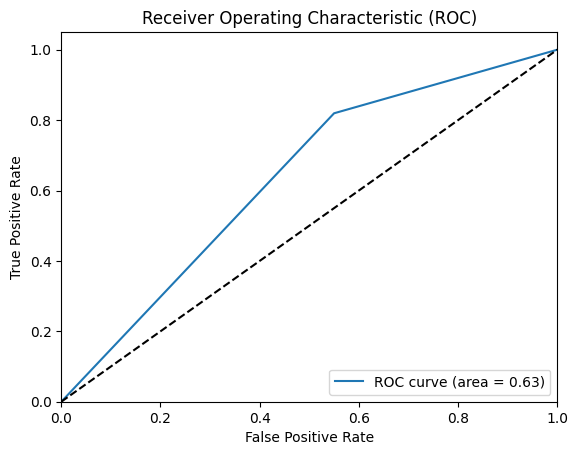

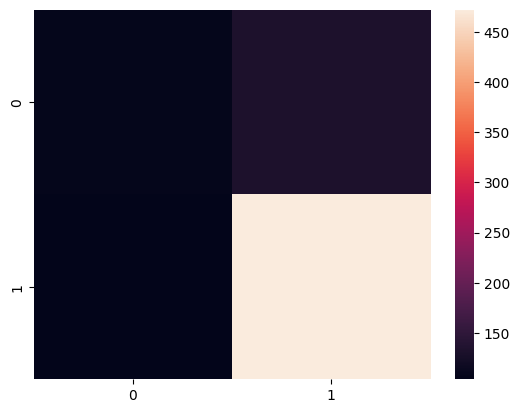

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 27, 64)            128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 27, 64)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1728)              0         
                                                                 
 dense_71 (Dense)            (None, 128)               221312    
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 1)                 129       
                                                      

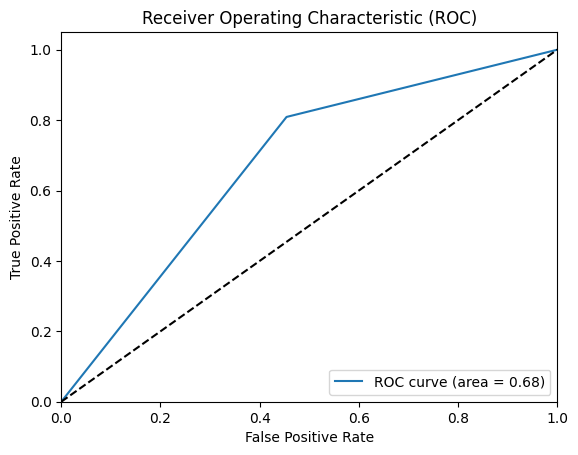

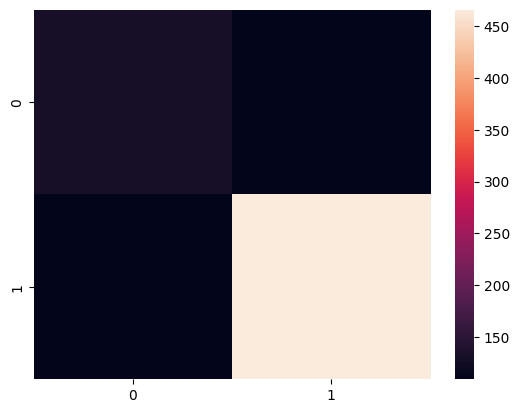

Epoch 13: early stopping
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 27, 1)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               66560     
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 64)                8256      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

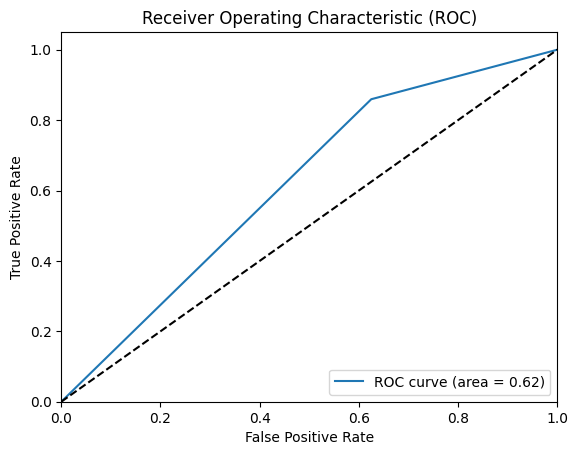

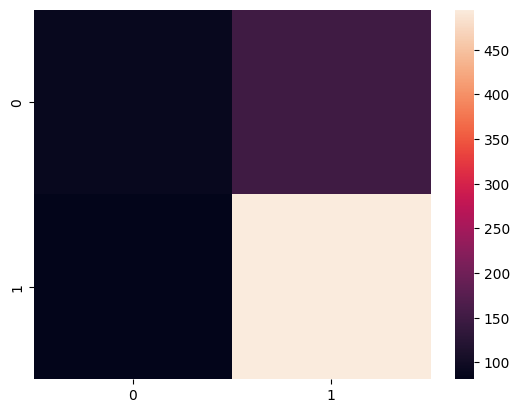

(4076, 1)
(3057,)
Logistic Regression Accuracy: 0.7059
Extra Trees Classifier Accuracy: 0.5993
Neural Network Accuracy: 0.7047


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


***********************************
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_76 (Dense)            (None, 256)               512       
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               32896     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dropout_41 (Dropout) 

/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

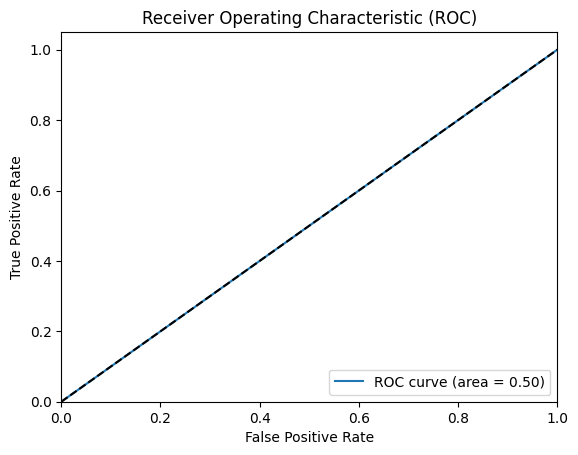

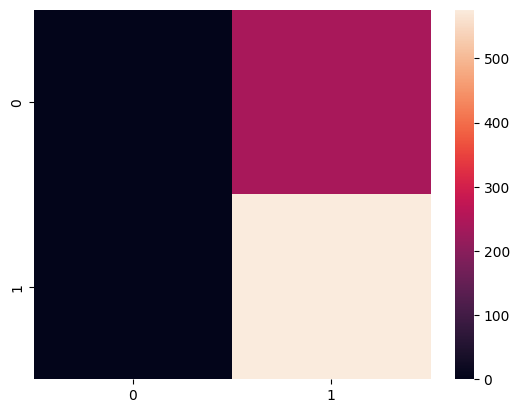

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 1, 64)             128       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_80 (Dense)            (None, 128)               8320      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 1)                 129       
                                                      

/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

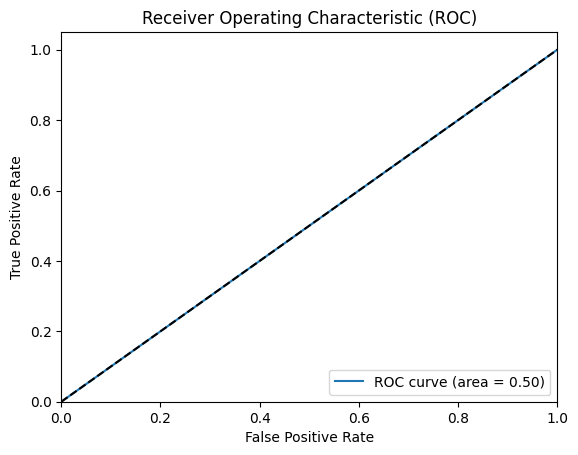

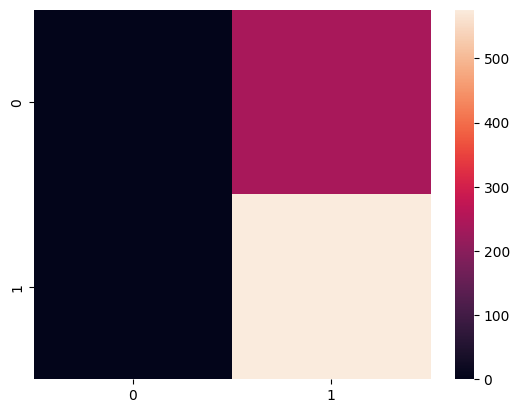

Epoch 31: early stopping
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 1, 1)]            0         
                                                                 
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dense_82 (Dense)            (None, 128)               16512     
                                                                 
 dense_83 (Dense)            (None, 64)                8256      
                                                                 
 dense_84 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

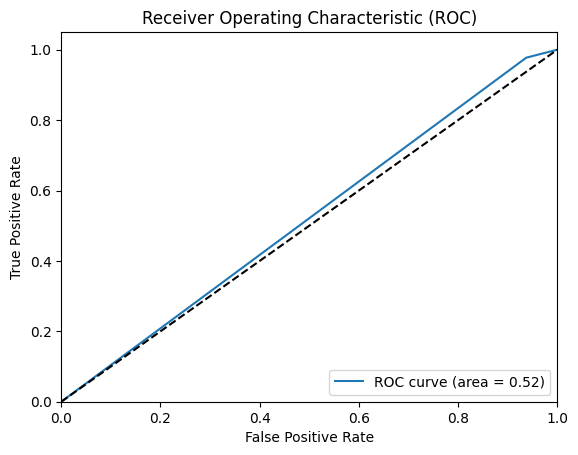

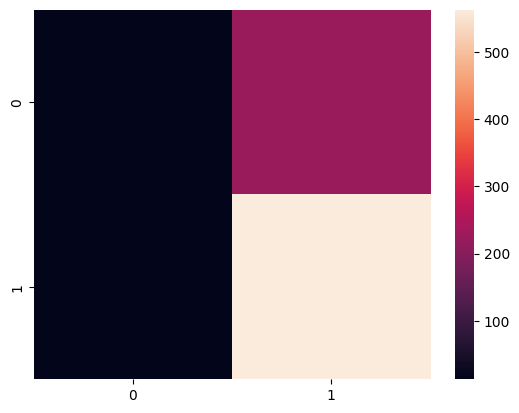

(4076, 1)
(3057,)
Logistic Regression Accuracy: 0.7255
Extra Trees Classifier Accuracy: 0.6311
Neural Network Accuracy: 0.7194


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


***********************************
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_85 (Dense)            (None, 256)               512       
                                                                 
 dropout_43 (Dropout)        (None, 256)               0         
                                                                 
 dense_86 (Dense)            (None, 128)               32896     
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 dropout_45 (Dropout) 

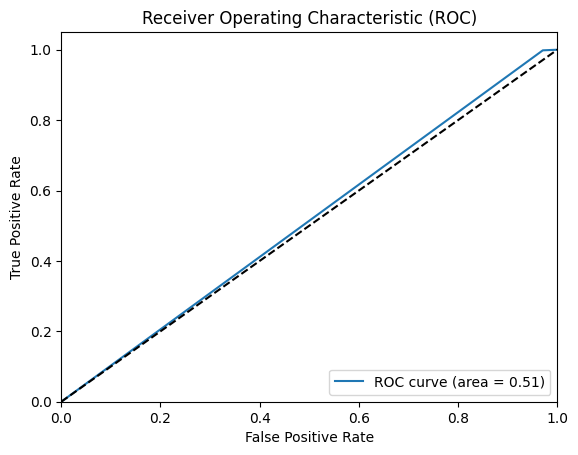

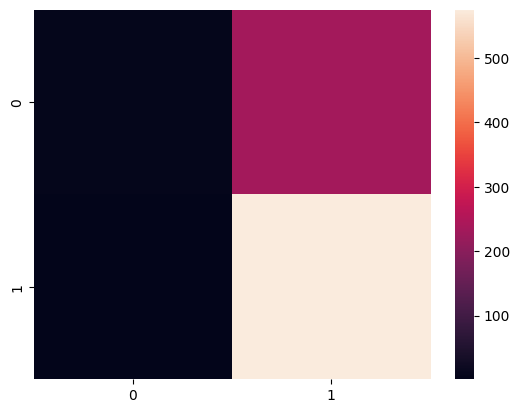

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 1, 64)             128       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 128)               8320      
                                                                 
 dropout_46 (Dropout)        (None, 128)               0         
                                                                 
 dense_90 (Dense)            (None, 1)                 129       
                                                      

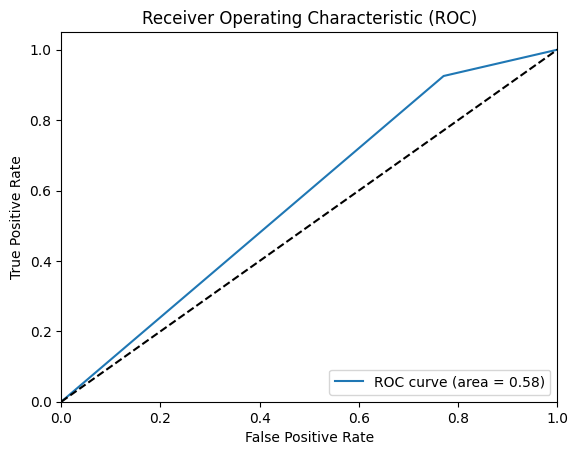

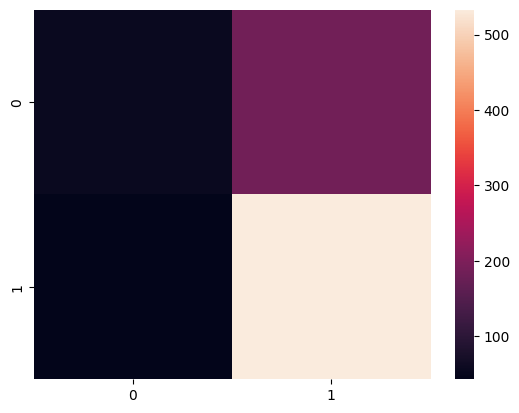

Epoch 32: early stopping
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1, 1)]            0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               66560     
                                                                 
 dense_91 (Dense)            (None, 128)               16512     
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dense_93 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

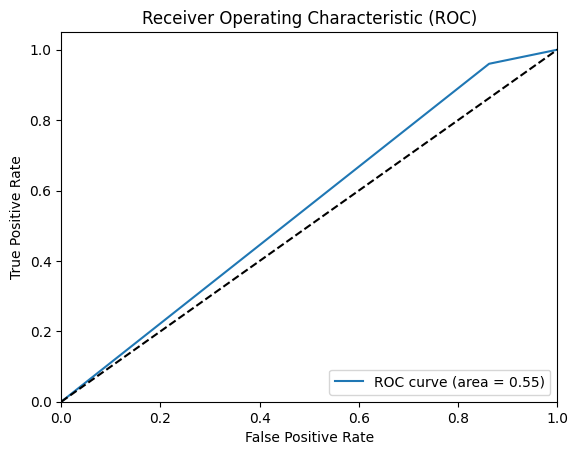

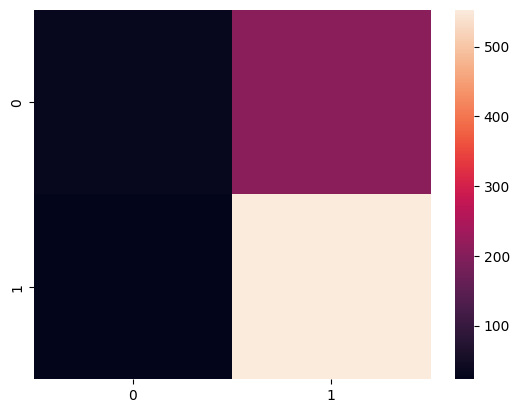

(4076, 10)
(3057,)
Logistic Regression Accuracy: 0.7868
Extra Trees Classifier Accuracy: 0.7708


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Neural Network Accuracy: 0.7696
***********************************
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_94 (Dense)            (None, 256)               2816      
                                                                 
 dropout_47 (Dropout)        (None, 256)               0         
                                                                 
 dense_95 (Dense)            (None, 128)               32896     
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                        

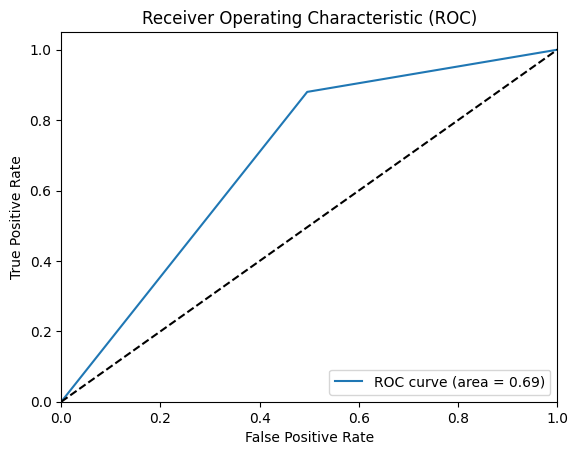

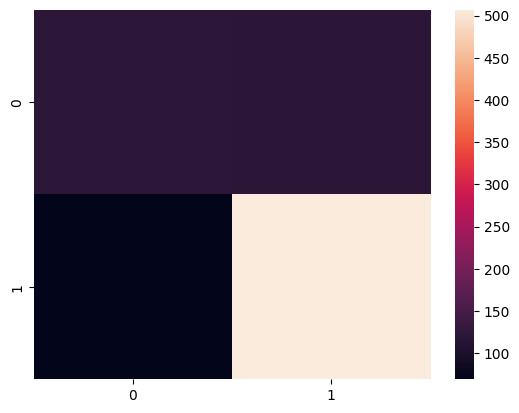

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 10, 64)            128       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 640)               0         
                                                                 
 dense_98 (Dense)            (None, 128)               82048     
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 1)                 129       
                                                     

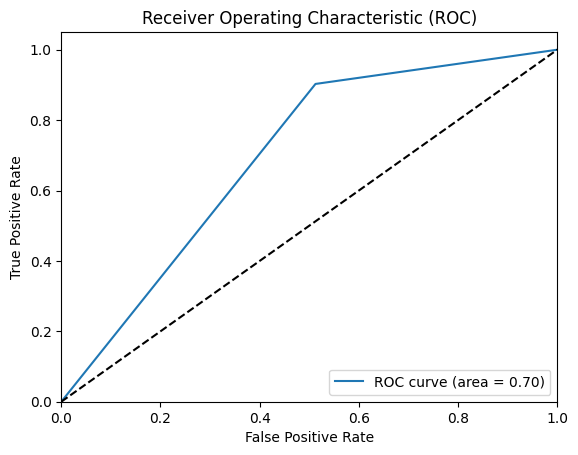

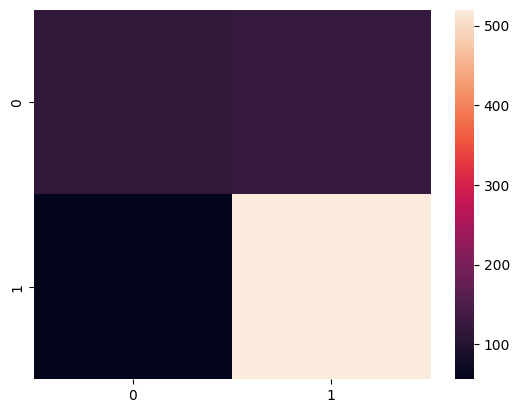

Epoch 15: early stopping
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 10, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               66560     
                                                                 
 dense_100 (Dense)           (None, 128)               16512     
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dense_102 (Dense)           (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

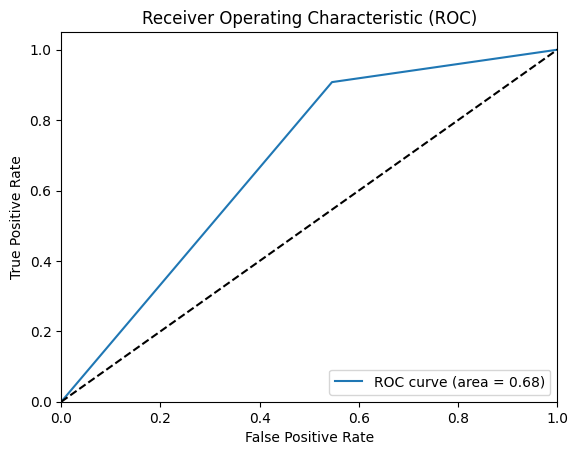

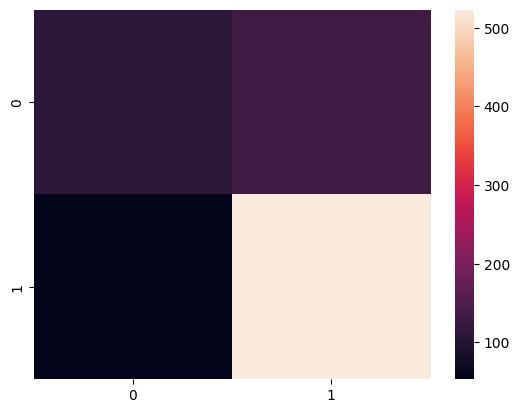

(4076, 1)
(3057,)
Logistic Regression Accuracy: 0.7451
Extra Trees Classifier Accuracy: 0.6605
Neural Network Accuracy: 0.7414


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


***********************************
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_103 (Dense)           (None, 256)               512       
                                                                 
 dropout_51 (Dropout)        (None, 256)               0         
                                                                 
 dense_104 (Dense)           (None, 128)               32896     
                                                                 
 dropout_52 (Dropout)        (None, 128)               0         
                                                                 
 dense_105 (Dense)           (None, 64)                8256      
                                                                 
 dropout_53 (Dropout) 

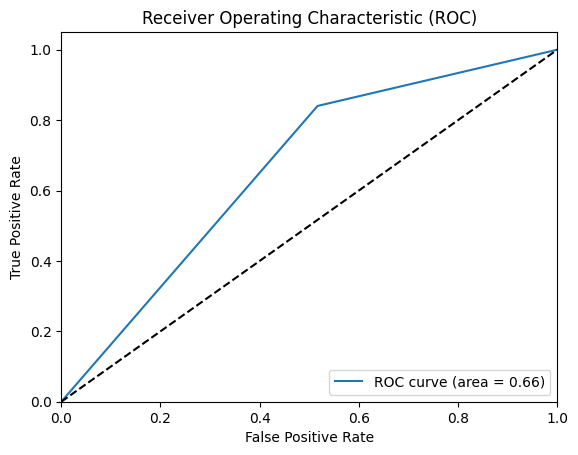

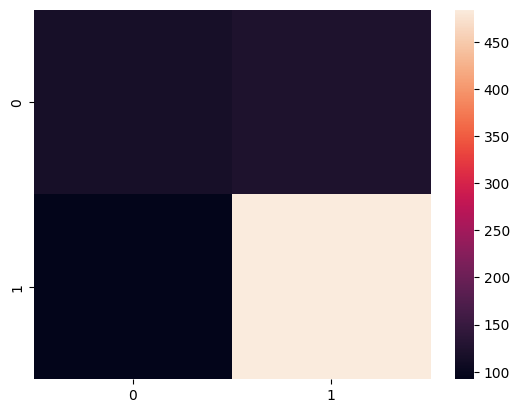

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 1, 64)             128       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_107 (Dense)           (None, 128)               8320      
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                                 
 dense_108 (Dense)           (None, 1)                 129       
                                                     

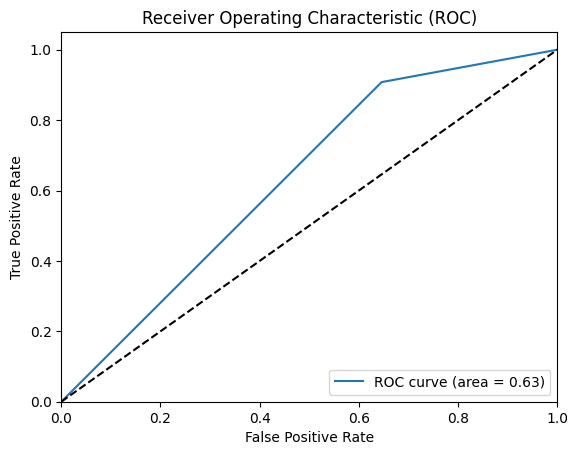

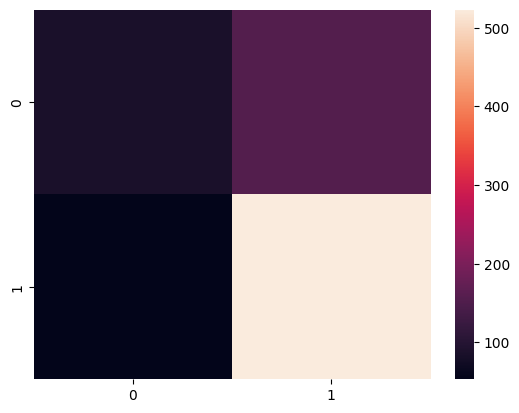

Epoch 24: early stopping
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 1, 1)]            0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               66560     
                                                                 
 dense_109 (Dense)           (None, 128)               16512     
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dense_111 (Dense)           (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

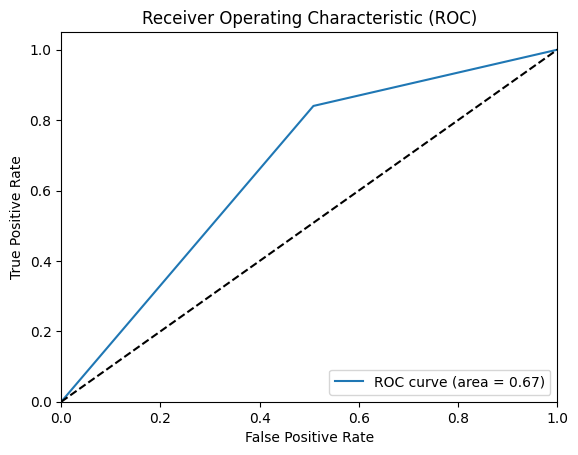

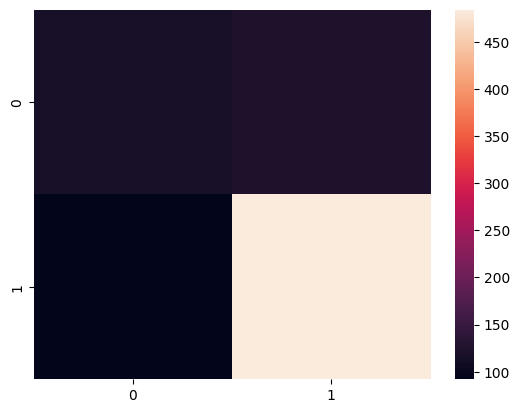

(4076, 28)
(3057,)
Logistic Regression Accuracy: 0.7328
Extra Trees Classifier Accuracy: 0.7328


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Neural Network Accuracy: 0.7304
***********************************
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_112 (Dense)           (None, 256)               7424      
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                        

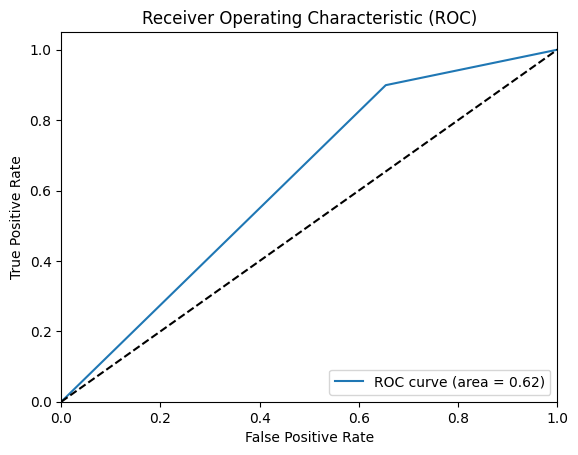

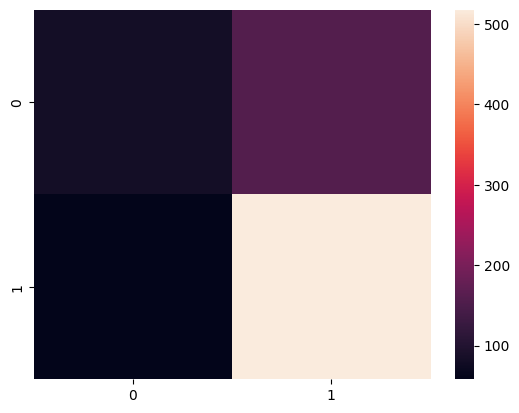

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 28, 64)            128       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 28, 64)           0         
 g1D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1792)              0         
                                                                 
 dense_116 (Dense)           (None, 128)               229504    
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_117 (Dense)           (None, 1)                 129       
                                                     

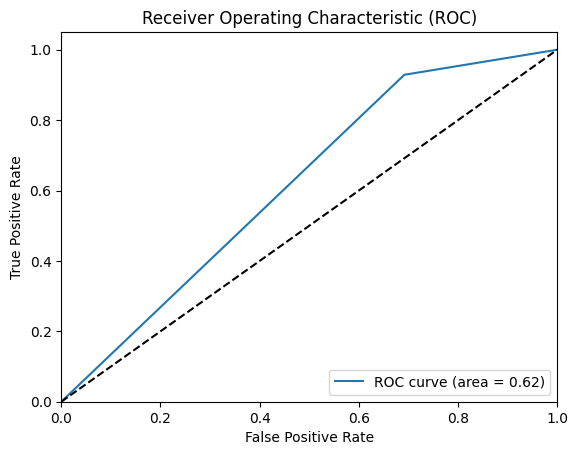

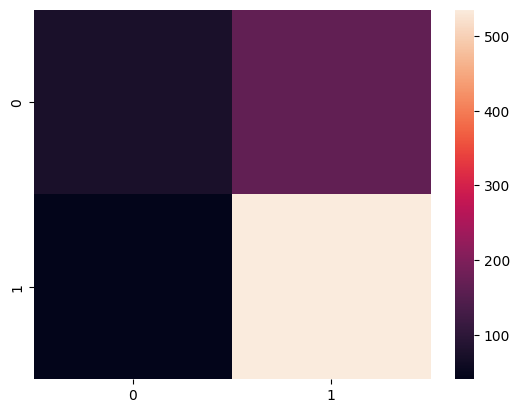

Epoch 43: early stopping
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 28, 1)]           0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               66560     
                                                                 
 dense_118 (Dense)           (None, 128)               16512     
                                                                 
 dense_119 (Dense)           (None, 64)                8256      
                                                                 
 dense_120 (Dense)           (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

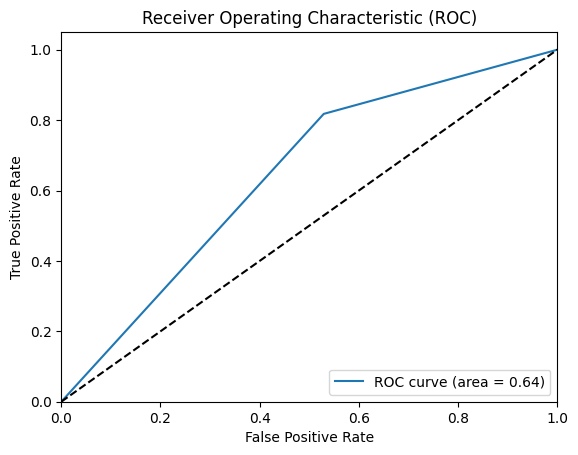

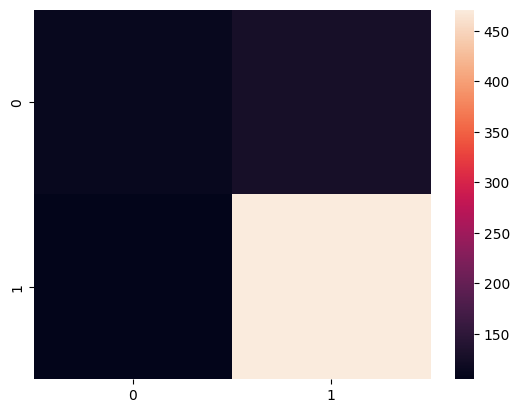

(4076, 40)
(3057,)
Logistic Regression Accuracy: 0.7696
Extra Trees Classifier Accuracy: 0.7647


/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/keerthana/opt/anaconda3/envs/CSC215-venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Neural Network Accuracy: 0.7537
***********************************
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 40)]              0         
                                                                 
 dense_121 (Dense)           (None, 256)               10496     
                                                                 
 dropout_59 (Dropout)        (None, 256)               0         
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_123 (Dense)           (None, 64)                8256      
                                                        

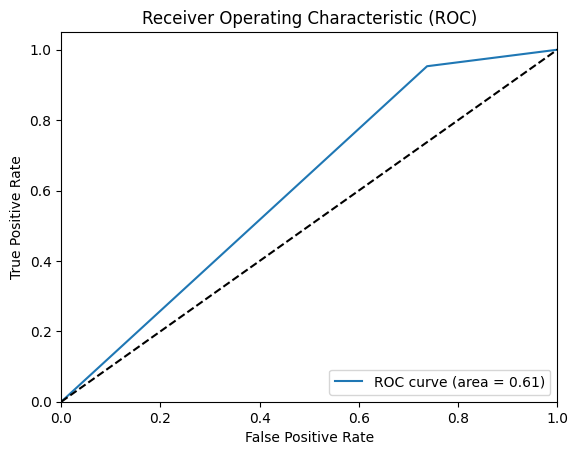

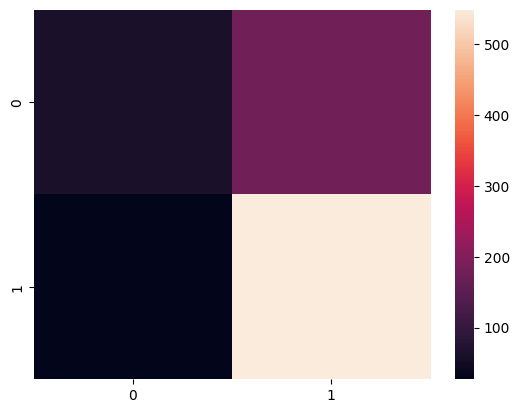

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 40, 64)            128       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 40, 64)           0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2560)              0         
                                                                 
 dense_125 (Dense)           (None, 128)               327808    
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_126 (Dense)           (None, 1)                 129       
                                                     

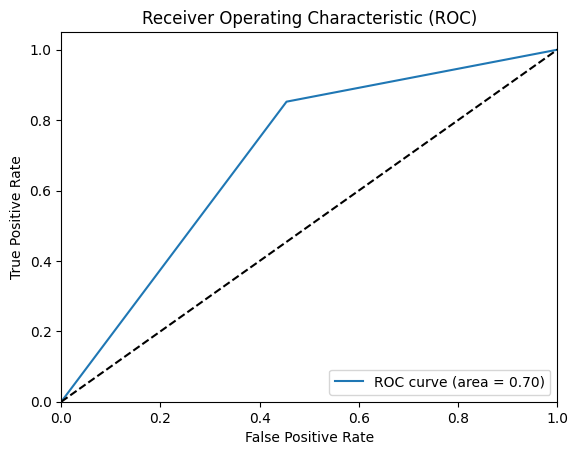

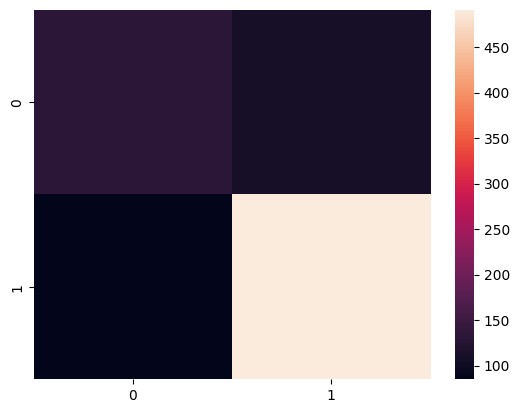

Epoch 20: early stopping
Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 40, 1)]           0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               66560     
                                                                 
 dense_127 (Dense)           (None, 128)               16512     
                                                                 
 dense_128 (Dense)           (None, 64)                8256      
                                                                 
 dense_129 (Dense)           (None, 1)                 65        
                                                                 
Total params: 91,393
Trainable params: 91,393
Non-trainable params: 0
_________________________________________________________________
*****************************

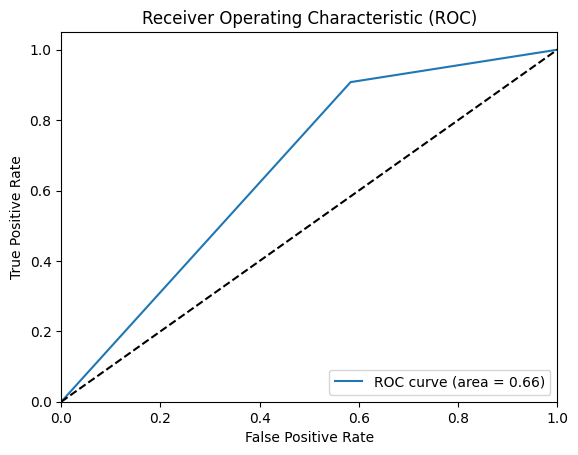

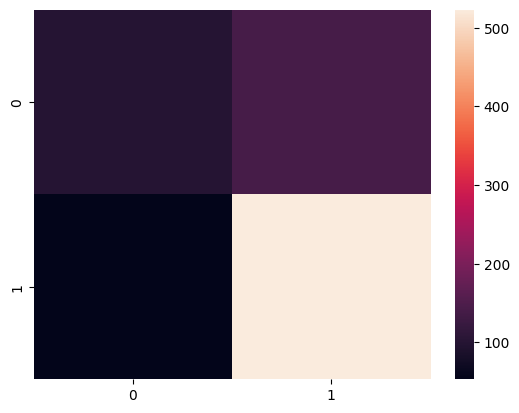

In [149]:
for x in combinations:
    X_train = np.column_stack(tuple(x[:-1]))
    Y_train = df_train['label'].values
    print(X_train.shape)
    print(y_train.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train , test_size=0.2, random_state=42)
    Classifier_train( X_train, Y_train, X_test, Y_test)
    neural_network_train(X_train, Y_train, X_test, Y_test,x[-1])
    convolutional_neural_network_train(X_train, Y_train, X_test, Y_test,x[-1])
    lstm_network_train(X_train, Y_train, X_test, Y_test,x[-1])